# Covarianza y correlación

vamos a ver cómo calcular la correlación y covarianza utilizando R:

In [26]:
tiempo <- c(195, 215, 243, 162, 185, 231, 234, 166, 253, 196, 220, 168, 207, 225, 169, 215, 147, 230, 208, 172)
unidades <- c(175, 189, 344, 88, 114, 338, 271, 173, 284, 277, 337, 58, 146, 277, 123, 227, 63, 337, 146, 68)

Calculamos la covarianza:

In [27]:
cov(tiempo, unidades)

[1] 2612.539

Observamos qué ocurre al multiplicar uno de los vectores por una constante:

In [28]:
cov(tiempo, 2*unidades)

[1] 5225.079

Calculamos la correlación:

ERROR: Error in tiempo(): no se pudo encontrar la función "tiempo"


In [4]:
cor(tiempo, unidades)

[1] 0.8545206

En este caso tenemos que ambas variables están fuertemente correlacionadas. Vamos a analizar qué ocurre si utilizamos dos variables que sabemos que no lo están:

In [5]:
# vamos a probar con un aleatorio:
set.seed(1)
a <- rnorm(100)
b <- rnorm(100)
cov(a, b)

[1] -0.0008554794

In [6]:
cor(a, b)

[1] -0.0009943199

# Regresión

Vamos a introducir el primer ejemplo de un modelo de regresión, en este caso vamos a escoger un conjunto de datos _irreal_ que nos permitirá en una primera aproximación comprender mejor este tipo de modelos:

In [7]:
set.seed(20)
a <- rnorm(50)
ejemplo_perfecto <- data.frame(speed = cars$speed, var = cars$speed + a)

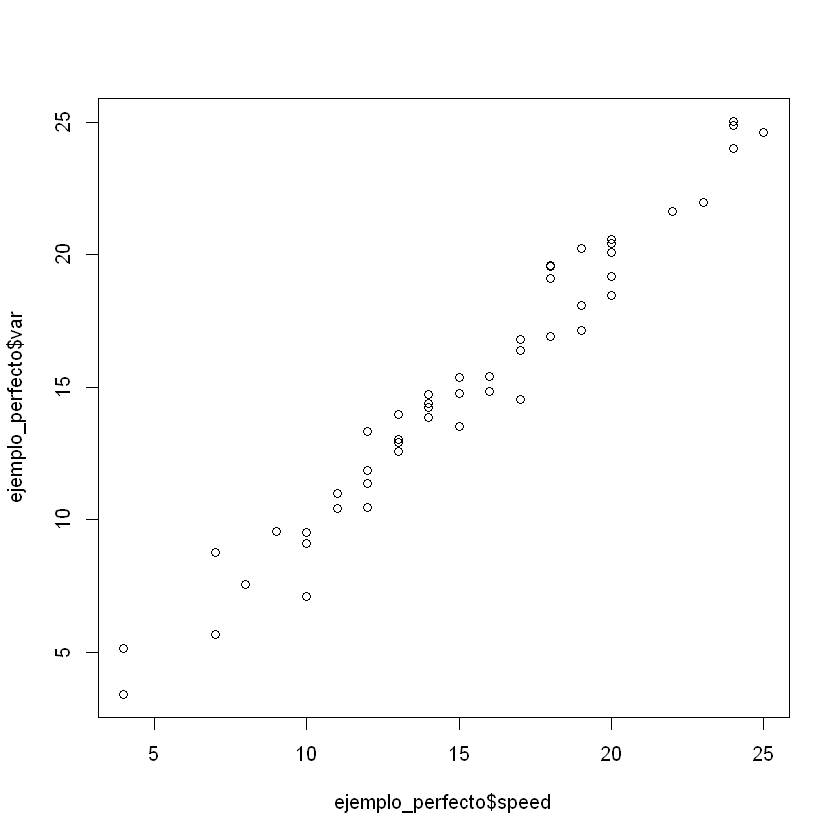

In [8]:
plot(ejemplo_perfecto$speed, ejemplo_perfecto$var)

In [9]:
prueba <- lm(speed ~ var, data = ejemplo_perfecto)

In [10]:
summary(prueba)


Call:
lm(formula = speed ~ var, data = ejemplo_perfecto)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.25298 -0.58188 -0.04807  0.63007  2.34233 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.88642    0.43225   2.051   0.0458 *  
var          0.95232    0.02674  35.619   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.02 on 48 degrees of freedom
Multiple R-squared:  0.9635,	Adjusted R-squared:  0.9628 
F-statistic:  1269 on 1 and 48 DF,  p-value: < 2.2e-16


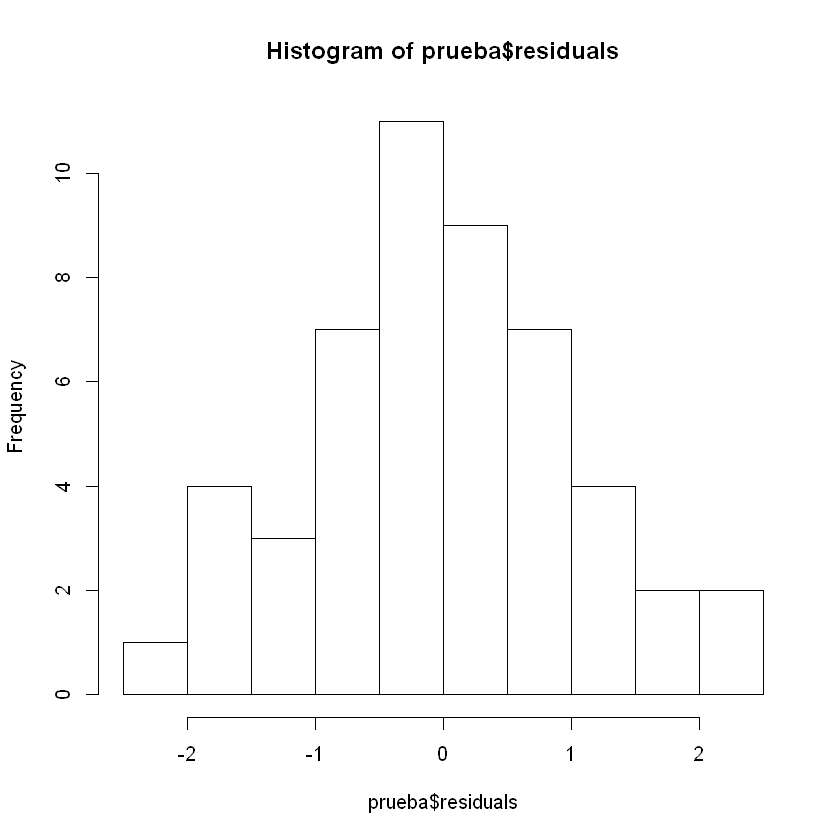

In [11]:
hist(prueba$residuals)

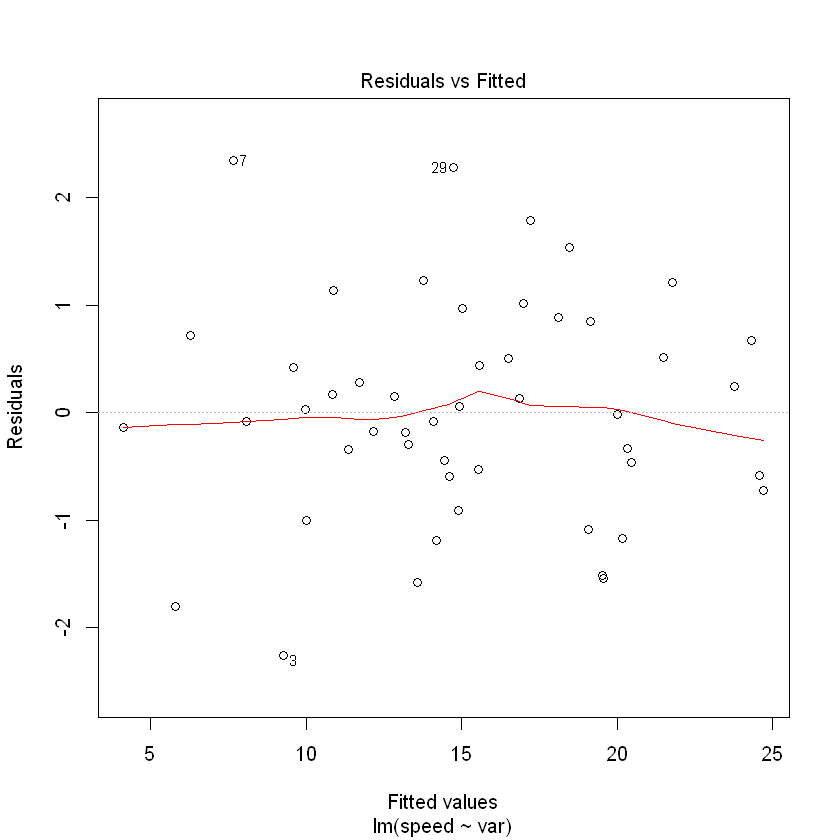

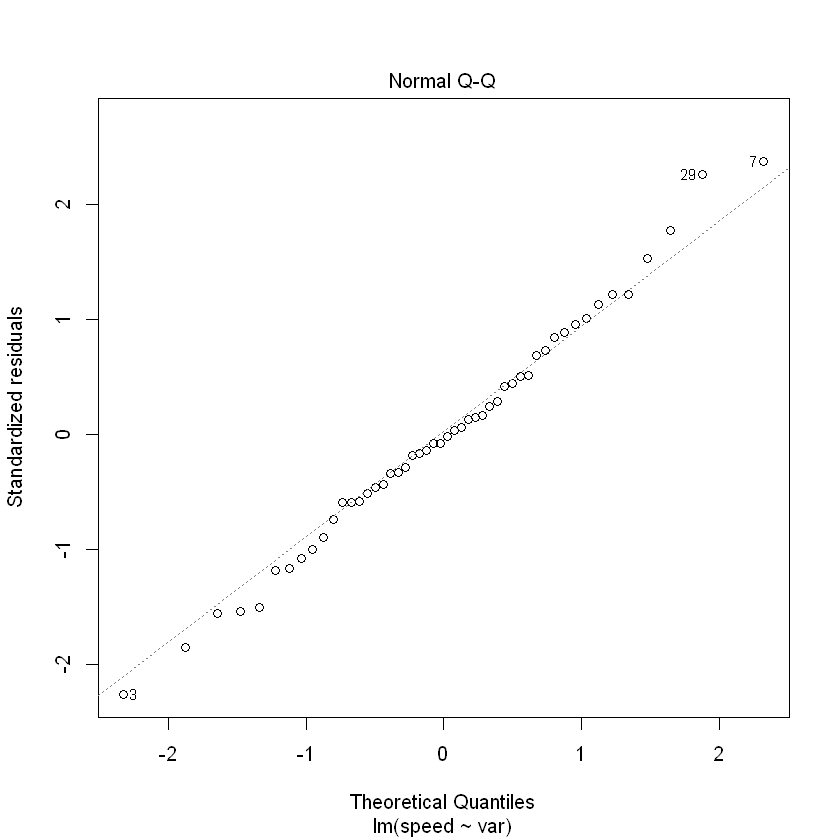

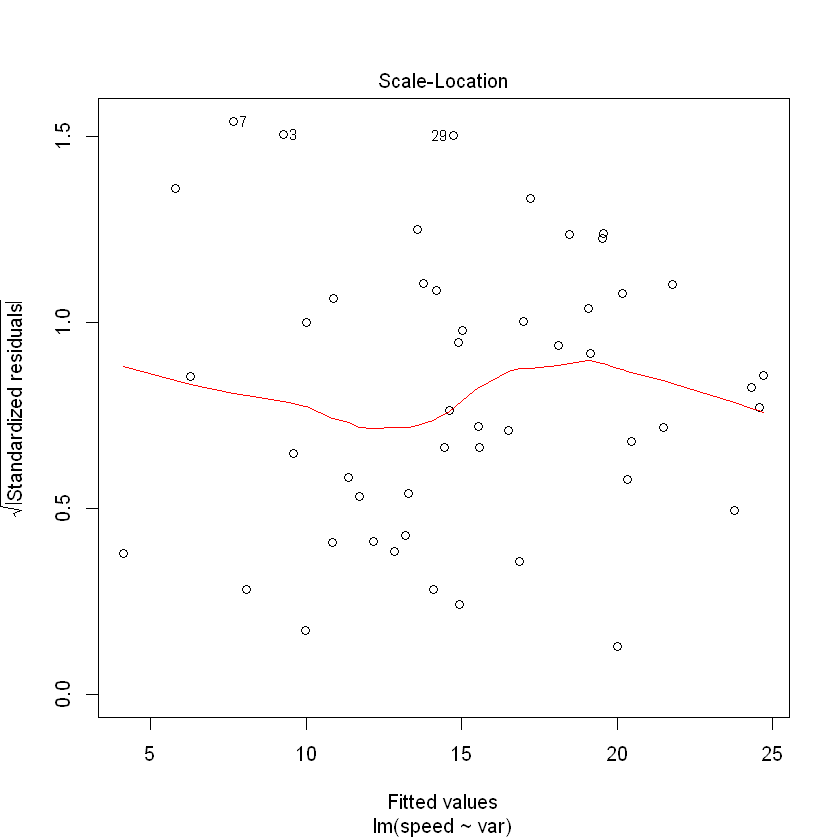

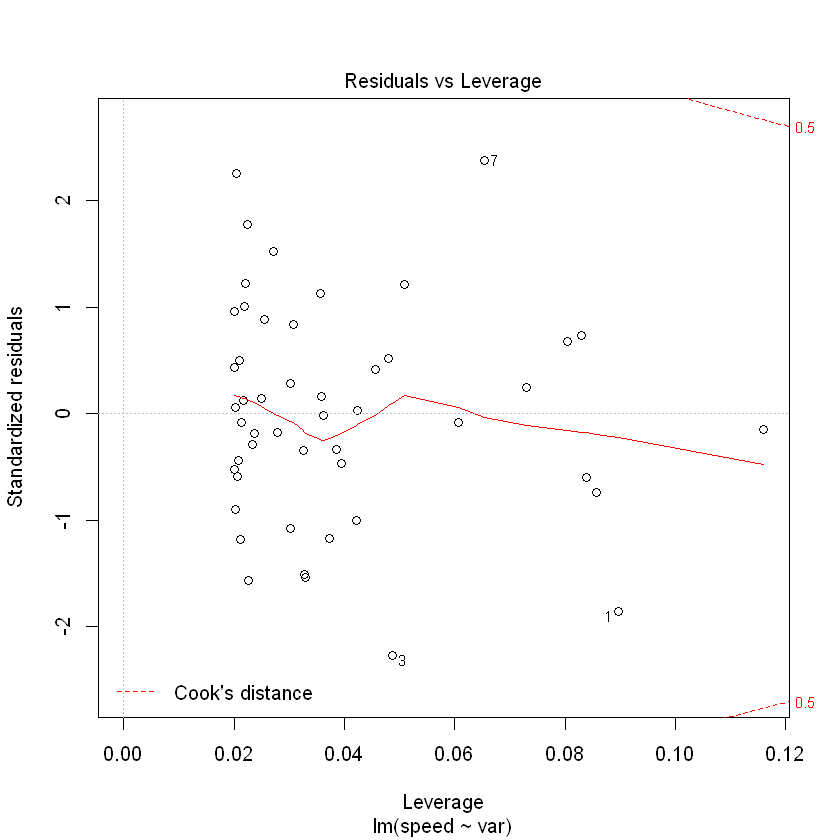

In [12]:
plot(prueba)

### Caso realista de estudio

Tomamos los datos utilizados durante la presentación, con el número de unidades por lote y el tiempo de fabricación:

In [13]:
tiempo <- c(195, 215, 243, 162, 185, 231, 234, 166, 253, 196, 220, 168, 207, 225, 169, 215, 147, 230, 208, 172)
unidades <- c(175, 189, 344, 88, 114, 338, 271, 173, 284, 277, 337, 58, 146, 277, 123, 227, 63, 337, 146, 68)
datos_regre <- data.frame(tiempo = tiempo, unidades = unidades)
head(datos_regre)

tiempo,unidades
195,175
215,189
243,344
162,88
185,114
231,338


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


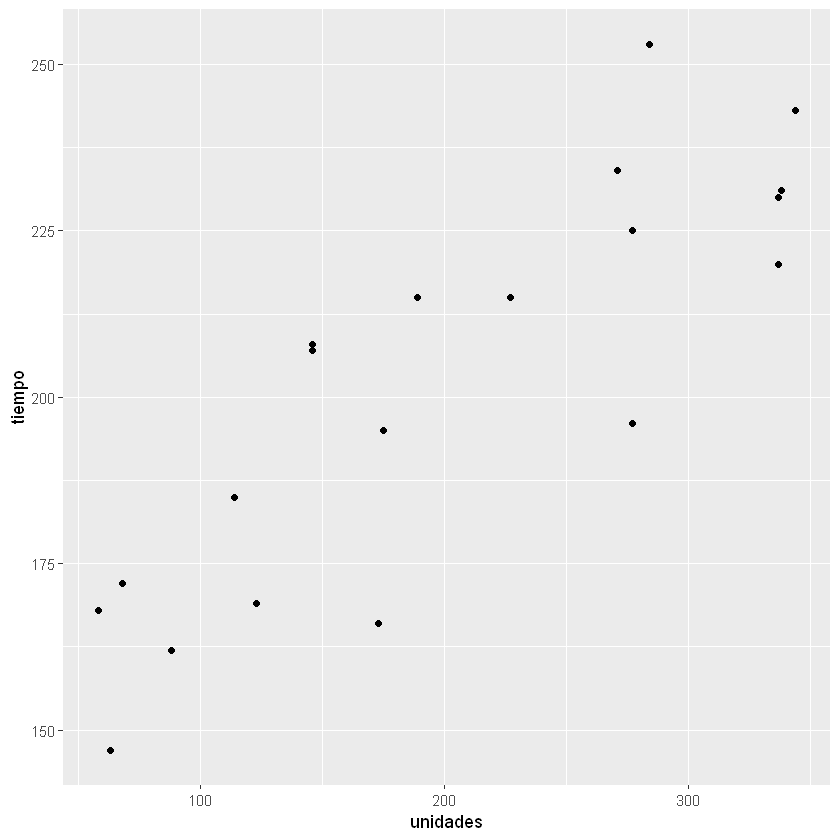

In [14]:
library(ggplot2)
plot <- ggplot(datos_regre, aes(x=unidades, y=tiempo)) + geom_point()
plot

Imaginemos que nos interesa realizar una predicción del tiempo que nos lleva producir un pedido a partir del número de unidades que hay en el mismo y así mejorar la eficiencia de nuestra cadena de producción.

Podemos observar que existe una cierta correlación entre ambas variables, según crece una de ellas, crece la otra, vamos a analizar esta relación a través de un modelo de regresión:

In [15]:
regresion <- lm(tiempo ~ unidades, data = datos_regre)

In [16]:
summary(regresion)


Call:
lm(formula = tiempo ~ unidades, data = datos_regre)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.597 -11.079   3.329   8.302  29.627 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 149.74770    8.32815   17.98 6.00e-13 ***
unidades      0.25924    0.03714    6.98 1.61e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.25 on 18 degrees of freedom
Multiple R-squared:  0.7302,	Adjusted R-squared:  0.7152 
F-statistic: 48.72 on 1 and 18 DF,  p-value: 1.615e-06


In [17]:
as.numeric(regresion$residuals)

[1]  -0.1152469  16.2553496   4.0726679 -10.5610965   5.6985827  -6.3718734
 [7]  13.9974148 -28.5967607  29.6272544 -25.5580439 -17.1126303   3.2161967
[13]  19.4028033   3.4419561 -12.6346053   6.4041115 -19.0800188  -7.1126303
[19]  20.4028033   4.6237657

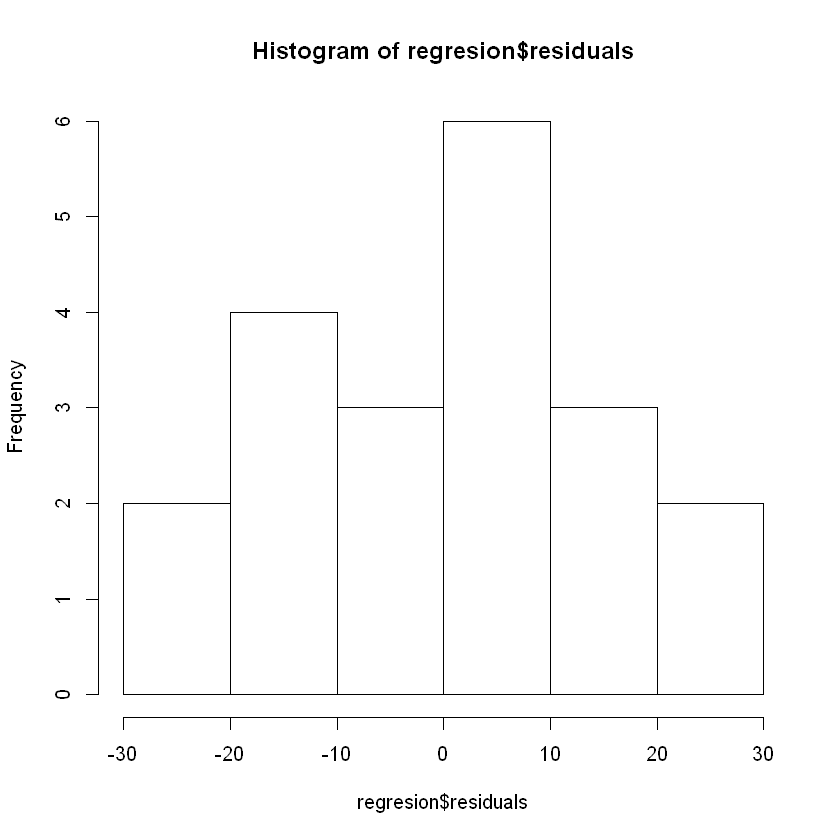

In [18]:
hist(regresion$residuals)

Vamos a comprobar algunas de las premisas que debían cumplir los datos para poder implementar un modelo de regresión:

### Normalidad:

Comprobaremos que los residuos realmente son normales realizando un test de Shapiro-Wilk, utilizado para comprobar si una distribución es normal:

In [19]:
shapiro.test(regresion$residuals)


	Shapiro-Wilk normality test

data:  regresion$residuals
W = 0.97712, p-value = 0.8917


Tenemos un p-valor > 0.05, por lo que podemos decir que es altamente probable que tengamos una distribución normal.

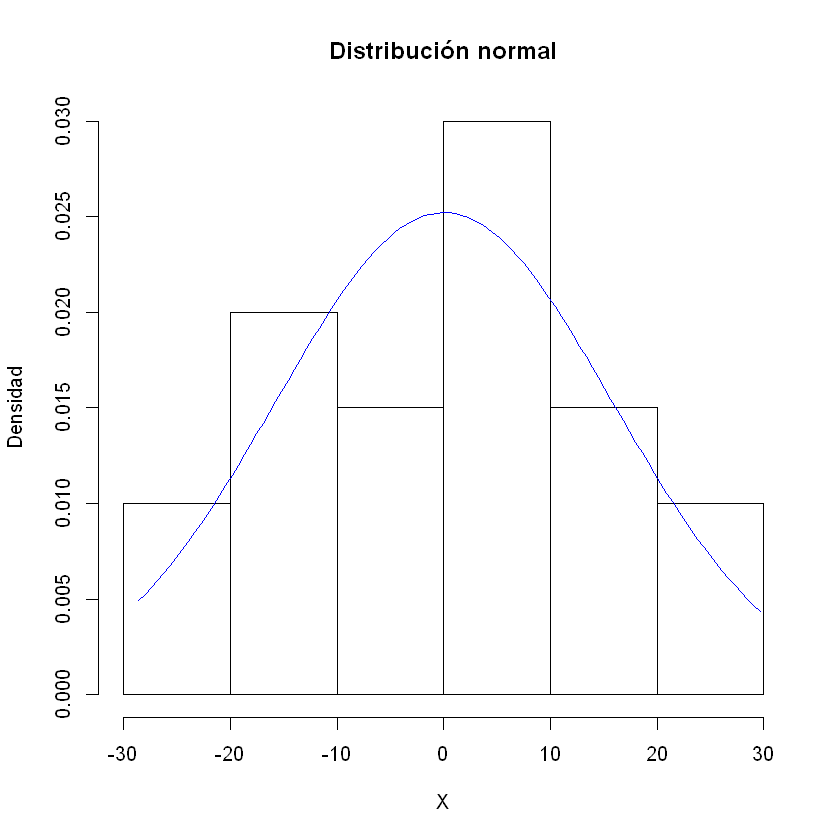

In [20]:
plotn <- function(x,main="Histograma de frecuencias \ny distribución normal",
                  xlab="X",ylab="Densidad") {
                  min <- min(x)
                  max <- max(x)
                  media <- mean(x)
                  dt <- sd(x)
                  hist(x,freq=F,main=main,xlab=xlab,ylab=ylab)
                  curve(dnorm(x,media,dt), min, max,add = T,col="blue")
                }
 
plotn(regresion$residuals,main="Distribución normal")

### Homocedasticidad:

De la misma manera, vamos a comprobar la homocedasticidad de los residuos utilizando el test de Breusch-Pagan, incluido dentro del paquete _lmtest_:

In [21]:
#install.packages("lmtest",repos = "http://cran.us.r-project.org")
lmtest::bptest(regresion)

ERROR: Error in loadNamespace(name): there is no package called 'lmtest'


De la misma manera que ocurría en el caso anterior, vemos que tenemos un p-valor > 0.05, por lo que también podemos confiar en que se cumple la condición de homocedasticidad. 

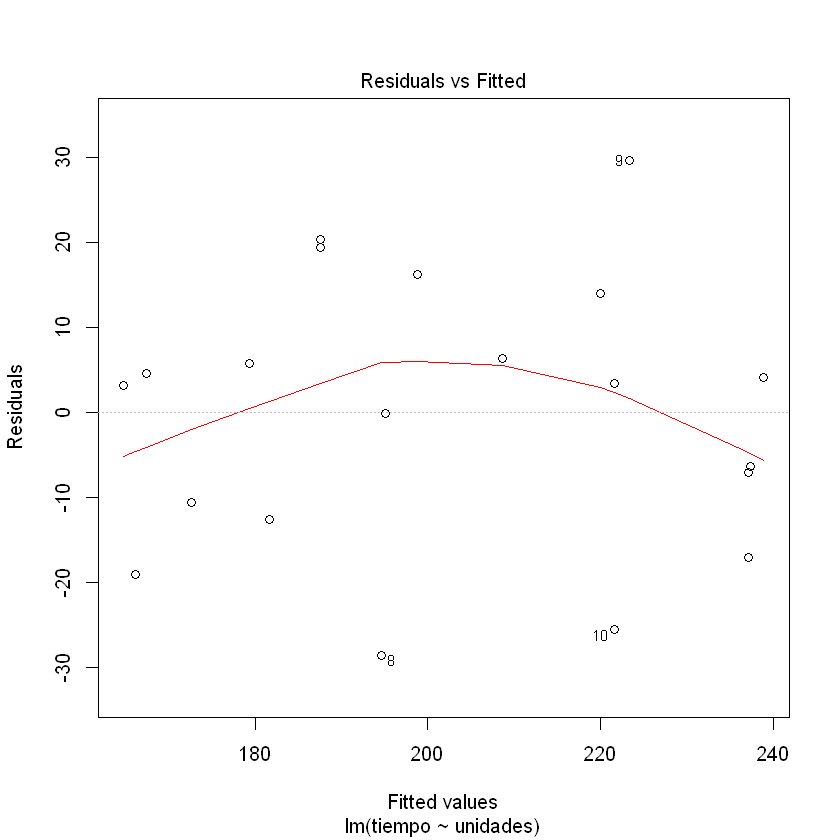

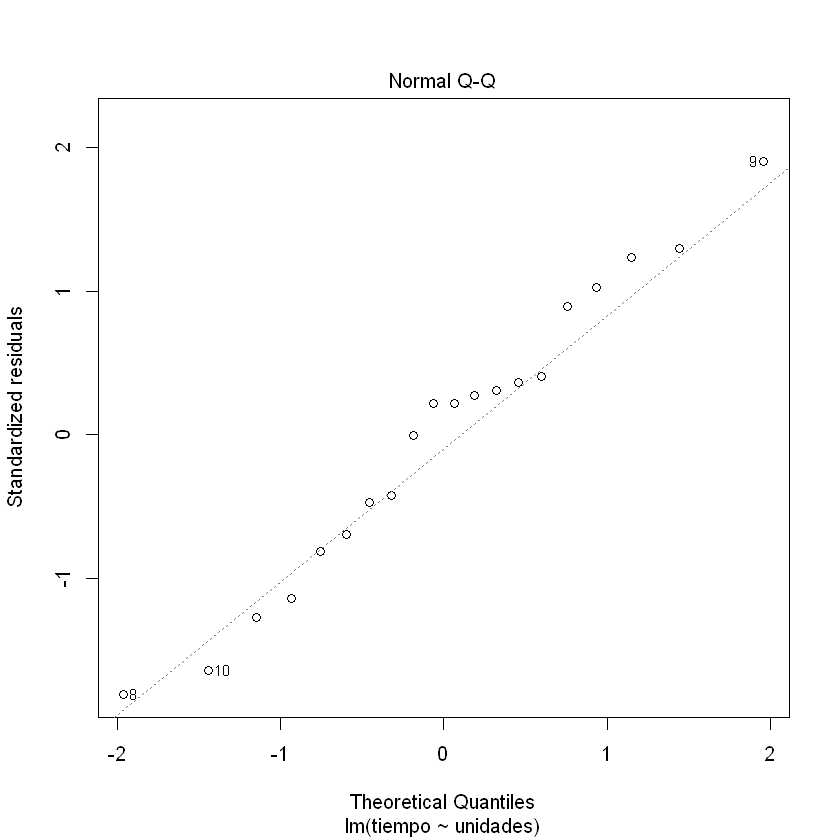

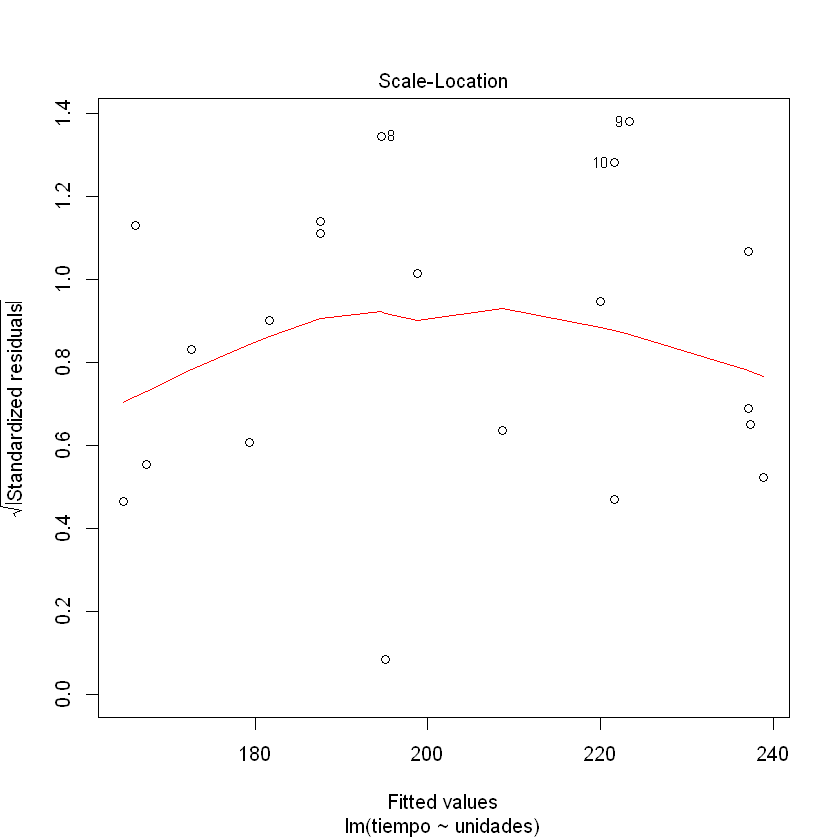

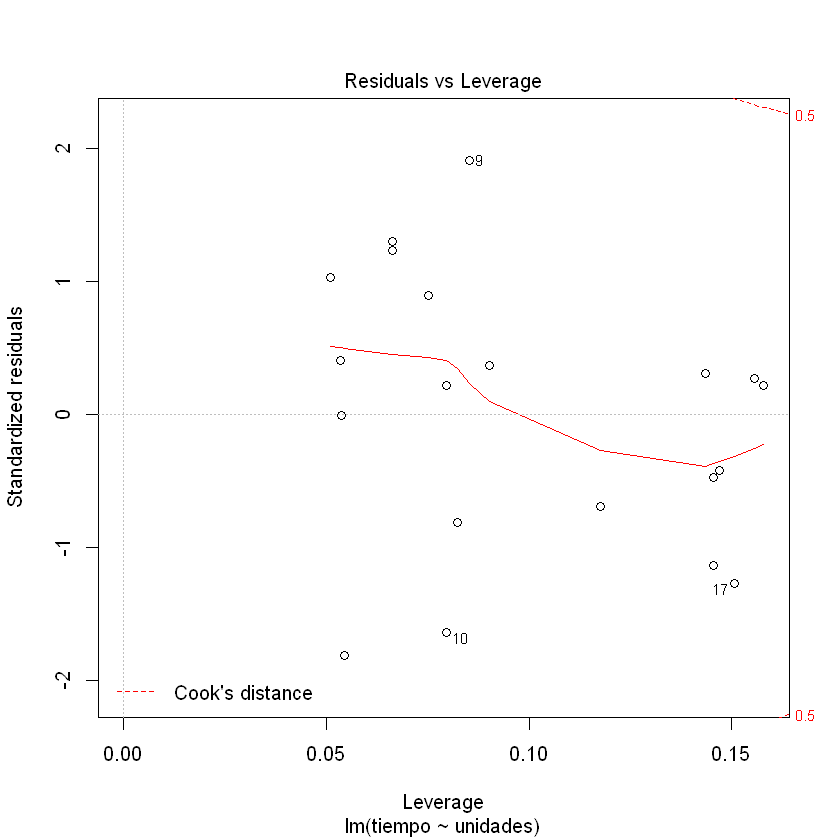

In [22]:
plot(regresion)

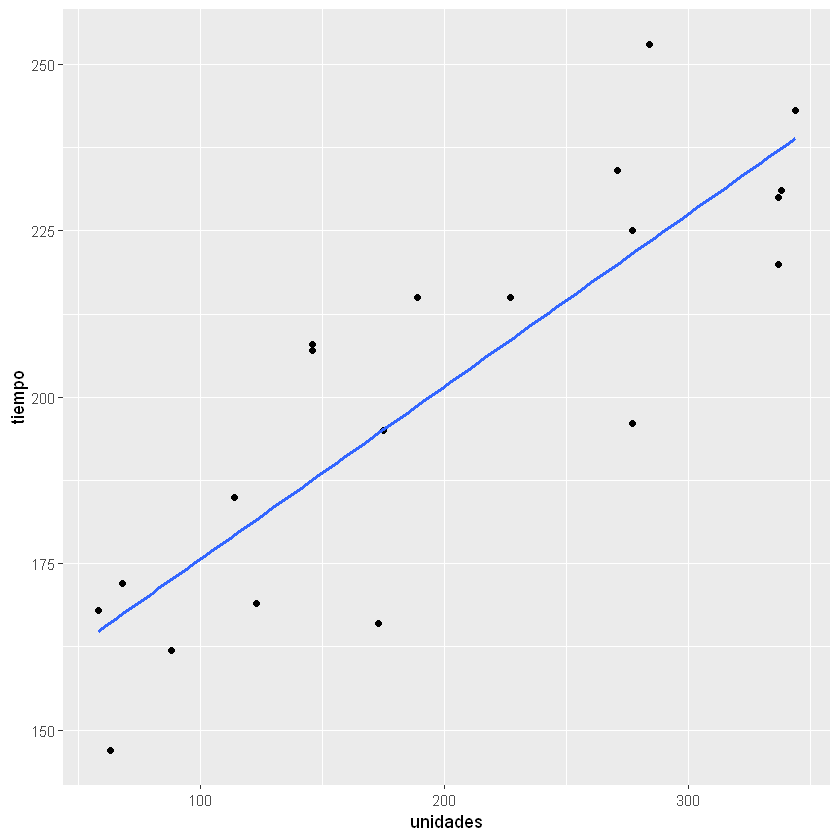

In [23]:
plot + geom_smooth(method = "lm", se = FALSE)

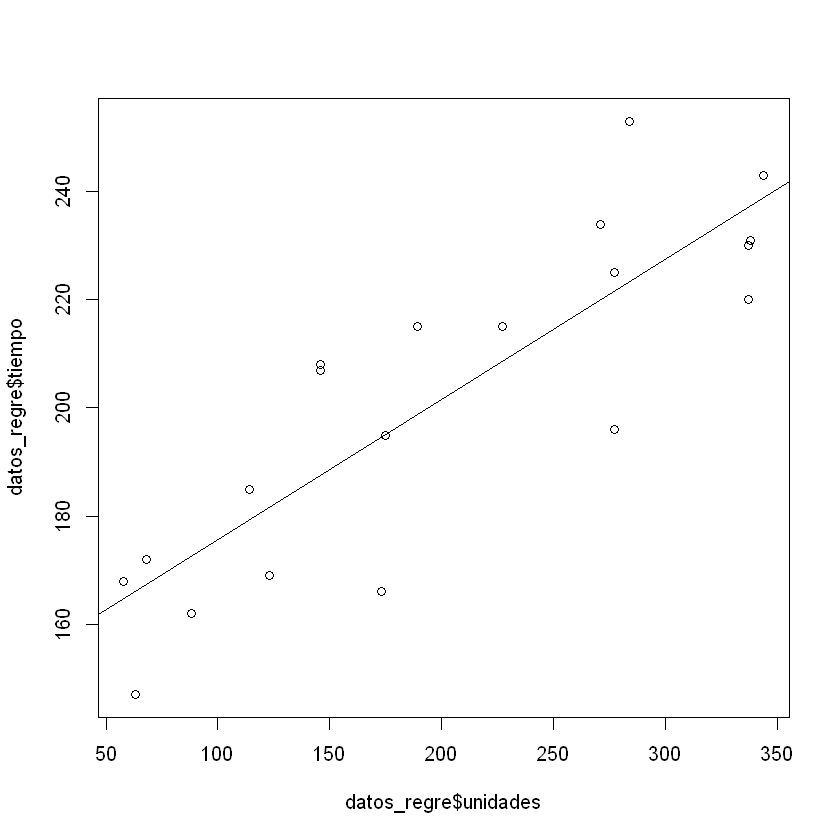

In [24]:
plot(datos_regre$unidades, datos_regre$tiempo)
abline(regresion)

### Predicción

Una vez hemos realizado el modelo y lo hemos validado, podemos realizar predicciones:

In [25]:
predict(regresion, data.frame(unidades = c(250, 210)))


1        2 
214.5585 204.1888